- title: Regression
- author: Alex
- date: 2023-11-06
- category: python

### Intro

Regression is a supervised learning problem: labelled data passed to a model, once model is instantiated some new input data can be passed in to predict what may happen next is a continuious sequence. 

The simplest model is a line. A line is a rough generalization that gives the ability to explain and predict variables that have a linear relationship with each other. A line that fits a set of data best is a Linear Regression. In regression problems, we are trying to predict a continuous-valued output: housing price is the most known dataset.

The variable that you are trying to predict is referred to as the dependent variable or response variable: denoted as y in the context of a simple linear regression and Y or yi in the context of multiple linear regression.

The data you can use for regression analysis should be divided into: 

    Dependent Variable (Response Variable): The variable you are trying to predict or explain.
    Independent Variables (Predictor Variables): The variables used to predict or explain the variation in the dependent variable.

### Regression, regressionless... Why Should I Care?


### Load Data, Eyeball
For a following code kernel that loads data housing dataset a lota credits to the author of my favorite data science blog Nick H. (NapsterInBlue): https://napsterinblue.github.io/notes/machine_learning/datasets/boston/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

data = load_boston()
X = data['data']
y = data['target']


values = np.c_[X, y]


df = pd.DataFrame(values)
df.head()
# MEDV, the median value of owner-occupied homes in $1000's
cols = list(data['feature_names']) + ['MEDV']

df.columns = cols
df.head()

print(data['DESCR'])

months = df.loc[:,"TAX"] # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = df.loc[:,"DIS"]# [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

plt.plot(months, revenue, "o")

plt.title("Boston Housing")

plt.xlabel("TAX ($)")
plt.ylabel("DIS (distance)")

plt.show()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<Figure size 640x480 with 1 Axes>

### Regression: Get The Line, Compute the Loss, Minimize it. 
A line in maths is determined by its slope and its intercept:

`y=mx+b`

m (slope) is a measure of how steep the line is, while  b (the intercept) is a measure of where the line hits the y-axis.
The mecanism of a linear regression is to find the best m and b that represents the line that lies along  with points.
To understand what goes on if point is far from the best line a concept of loss (squared distance) has to be introduced. **Loss**, is a measure of how bad the model’s prediction is (referred as error sometimes).To find the loss, sum squared distance from each point to the line.

See the following example to understand slope, intercept and loss of line. 

In [3]:
x, y = ([2, 3, 4], [5, 2, 4])
#y = x
m1, b1 = 1, 0
#y = 0.5x + 1
m2,b2  = 0.5, 1

slope, intercept = m1, b1

y_predicted1 = [slope*x_value + intercept for x_value in x]

slope, intercept = m2, b2

y_predicted2 = [m2*x_value + b2 for x_value in x]

total_loss1 = sum([(i[0] - i[1])**2 for i in zip(y,y_predicted1)])
total_loss2 = sum([(i[0] - i[1])**2 for i in zip(y,y_predicted2)])

print('total_loss1, total_loss2:', total_loss1, total_loss2)
if total_loss1< total_loss2:
    better_fit = total_loss1
    print(f'better fit is total_loss1 {total_loss1}')
else:
    better_fit = total_loss2

total_loss1, total_loss2: 10 10.25
better fit is total_loss1 10


To find the best line that fits the you are **minimizing loss**, and for this you have two parameters to tune: the slope and intercept to find pair that minimizes loss on average across all of the data. Some datasets have even more than one line of best-fit.
As humans we have an intuition where the line should be first, and then enter the parameters to match that image that is what machine learning also tries to achieve.

### Gradient Descent for Intercept
Fancy name for minimization function (find the gradient of intercept(b) at every point) is gradient descent.

Imagine parabole-shaped curve and your job is to find the bottom of it since lower point than that you cannot get. You iterate through the range of values for parameter you can chage (here intercept) and update coordinates as long as loss is decreasing gradually. When you hit the bottom you need to stop iteration. Gradient descent is a process by which we find the bottom, where word gradient stands for the slope of the curve.

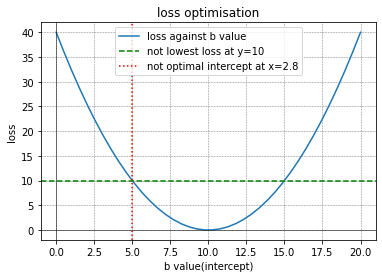

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def upward_parabola(x, a):
    return a * x**2

x_values = np.linspace(-10, 10, 40)

a = 0.4

y_values = upward_parabola(np.abs(x_values), a)
x_values = np.linspace(0, 20, 40)
plt.plot(x_values, y_values, label=f'loss against b value')

plt.xlabel('b value(intercept)')
plt.ylabel('loss')
plt.title('loss optimisation')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axhline(y = 10, color='g', linestyle='--', label='not lowest loss at y=10') # y=7, color='r', linestyle='--', label='Horizontal Line at y=7'
plt.axvline(x=5, color='r', linestyle=':', label='not optimal intercept at x=2.8')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.legend()
plt.show()

The curve consists of n vertices ($\ x_i, y_i$) we are iterating through all of them and compute n intercept for each of these points.

While iterating let's pay attention at a guess of 5 for the intercept and look at y at the intersection point with the curve, the slope is downward because moving on the intercept a bit, should lower the loss. It means gradient follows downwards - we are still moving to the direction that decreases our loss.

The gradient (derivative) of the loss function with respect to the intercept in a linear regression model, gives the rate of change of the loss. The formula comes out to be for a simple linear regression model (only an intercept and slope parameters given) the mean squared error (MSE):

$\frac{\partial}{\partial b} \text{MSE} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - f(x_i))$

or since we know what $\ f(x_i))$ is:

$\frac{\partial}{\partial b} \text{MSE} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - (mx_i​+b))$


    N is the number of points we have in our dataset
    m is the current gradient guess
    b is the current intercept guess


Notice formula represents the summation over all data points multiplied by -2/N. The negative sign indicates the direction in which the intercept should be adjusted to reduce the mean squared error. The factor of −2/N is a result of the derivative calculation used to update the intercept parameter efficiently. Derivative calculation is heavy. So chose either accept -2/N or wrap your head around following derivation: 
 $ \
\frac{\partial}{\partial b} \text{MSE} = \frac{\partial}{\partial b} \left( \frac{1}{N} \sum_{i=1}^{N} (y_i - f(x_i))^2 \right) = -\frac{2}{N} \sum_{i=1}^{N} (y_i - f(x_i)) \frac{\partial}{\partial b} (y_i - f(x_i)) = -\frac{2}{N} \sum_{i=1}^{N} (y_i - f(x_i))
\$

Look at this one if you prefer python: 
```python
def get_gradient_at_b(x,y,m,b):
    # takes in a set of x values, x, 
    # a set of y values, y,
    # a slope m, and an intercept value b
    # computes a diff that has the sum of 
    # all differences
    diff = sum([(y[i] - (m*x[i]+b)) for i in range(0,len(x))])
    b_gradient = -2/len(x) *diff
    return b_gradient
```

### Gradient Descent for Slope
This describes the way the loss changes as the slope of our line changes:

$\frac{\partial}{\partial b} \text{MSE} = -\frac{2}{N} \sum_{i=1}^{N} x_i (y_i - (mx_i​+b))$
```python
def get_gradient_at_m(x, y, m, b):
  diff = sum([x[i]*(y[i] - (m*x[i]+b)) for i in range(0,len(x))])
  m_gradient = -2/len(x) *diff
  return m_gradient
```

### Synthesis:Put Together Gradient Descent for Slope and Intercept
Given both the m gradient and the b gradient, we’ll be able to follow both of those gradients in right direction (downwards) to the point of lowest loss (both the m value and the b value) wich are the best m and the best b to fit our data! 
#### Steps
Remember we need to take some steps (pick/update value b) along with a parabola curve where the size of the step has to be not too big or not too small. A 'step size' determines a size of change to the parameters step.
##### Implication of a too large or too small steps.
Step derived from gradient scaled by learning rate. Let us take small learning rate and see the effect. A new b value in sequence computed like this:

`next_b = current_b - (learning_rate * b_gradient)`

where current_b is b value on our current iteration step, `b_gradient` is the gradient of the loss curve for our iteration step, and `learning_rate` is the size of the step wich is rather small: 0.01.

### Convergence

Convergence is state when the loss is not changing a lot, the best values for the parameters m and b are supposed to be reached when the program converge. 
At some iteration step program reaches plateau: stabilized value of parameter b regardless of iteration. Once the loss is less than some threshold value for a bunch of adjacent steps we can stop iteration. 
The alternative convergence is divergence (not converge at all) is the result of large learning rate.

### Learning Rate
The job is iteratively get the best m and b values (pairwise): from state corresponding to each pair we move *a little* in the direction of gradients. The step size to perform gradient descent (go down the loss curve) is a learning rate, the art of choosing it is not get runtime before getting an answer(gradient descent get to converge efficiently), and not too large to not to skip over the best value. Divergence is a result of large step: it is causing a zig-zag-like pattern due to constantly overshooting the best-value (minimum).

### Recap: Gradient Descent From Scratch
Now when we know how to calculate the gradient and know how to choose direction 
let us put it together to reach convergence. 

In code that follows let us focus on code after `# main call`:
call a function called gradient_descent() that takes in x, y, learning_rate, and a num_iterations.

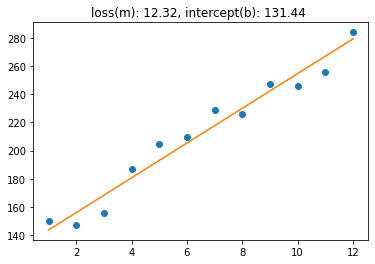

In [5]:
import matplotlib.pyplot as plt

def get_gradient_at_b(x,y,b,m):
    # takes in a set of x values, x, 
    # a set of y values, y,
    # a slope m, and an intercept value b
    # computes a diff that has the sum of 
    # all differences
    diff = sum([(y[i] - (m*x[i]+b)) for i in range(0,len(x))])
    b_gradient = -(2/len(x)) *diff
    return b_gradient

def get_gradient_at_m(x, y, b,m):
    diff = sum([x[i]*(y[i] - (m*x[i]+b)) for i in range(0,len(x))])
    m_gradient = (-2/len(x)) *diff
    return m_gradient

# step_gradient function here
# decides the way to step to new b, m
def step_gradient(x,y,b_current,m_current, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current,m_current)
    m_gradient = get_gradient_at_m(x, y, b_current,m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return (b,m)

# inputs to  function 
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [150, 147, 156, 187, 205, 210, 229, 226, 247, 246, 256, 284]
# call this function a bunch,
# in order to move b,m towards lower and lower loss.

# create a loop that runs num_iterations times
# each step it call step_gradient() with
# b, m, x, y, and learning_rate
# update the values of b and m with the values from step_gradient()
#Your gradient_descent function here:  
def gradient_descent(x, y, learning_rate, num_iteration):
    b = 0
    m = 0
    for i in range(num_iteration):
        b, m = step_gradient(x, y,b, m, learning_rate)
    return [b,m]  
# current intercept guess, slope guess
# b,m = 0, 0
# run your gradient_descent function
# here i call function in order to move b,m values toward lower loss
b, m = gradient_descent(months, revenue, 0.01, 1000)

y = [m*x + b for x in months]
plt.plot(months, revenue, "o")
plt.plot(months, y)
plt.title(f'loss(m): {round(m,2)}, intercept(b): {round(b,2)} ')
plt.show()

### Pass the Real Data to Gradient Descent
Until now we are figured out way to find b and m values using gradient descent. Let's try it out on another dataset and check whether it does look right.

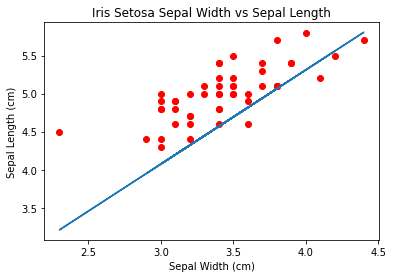

In [6]:
import pandas as pd
import seaborn as sns

# Load Iris dataset
iris = sns.load_dataset('iris')

# Filter for Iris setosa
setosa_data = iris[iris['species'] == 'setosa']

# Assign width and height to x and y
X = setosa_data['sepal_width']
y = setosa_data['sepal_length']
b,m = gradient_descent(X,y, 0.0001,1000)
# y_predictions each element of X multiplied by m and added to b.

y_predictions = [element*m + b for element in X]
# Plot the data
plt.scatter(X, y, c= 'red')
plt.plot(X, y_predictions)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Iris Setosa Sepal Width vs Sepal Length')
plt.show()

### Regression Out of the Box 
Python module Scikit-learn (sklearn) among other has the `linear_model` module, that has a `LinearRegression()` function. 
Differences with our own implementation are few: in OOP implementation of LinearRegression() the .fit() method returns two variables: 
1. the `line_fitter.coef_` (the slope), 
2. the `line_fitter.intercept_` (the intercept). 

`num_iterations` and the `learning_rate` have default values within scikit-learn. 

### Execute Regression Analysis Using Scikitlearn

Notice how uncomplicated call to the algorithm is: in 3 lines you can find the slope and intercept that mimimize the loss. Given training input data I can proceed with the following steps:

```python
import pandas as pd
from sklearn.linear_model import LinearRegression
# instantiate regression model
regression_model = LinearRegression()
# pass the training data to the model
regression_model.fit(X_train, y_train)
# Use the trained model to predict the corn yield for the testing set
y_pred = regression_model.predict(X_test)
```

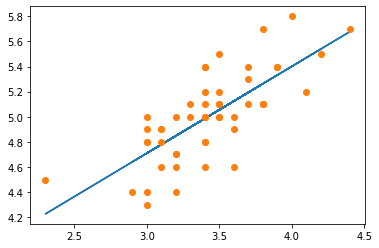

In [7]:
from sklearn.linear_model import LinearRegression


X = np.array(list(X)) # .reshape(-1, 1)
# next step is crucial since 2D array is expected  
# while my data has a single feature (1D)
X2 = X.reshape(-1,1) 

# -------------'magic' 3 lines start
# instantiate a model object 
line_fitter = LinearRegression()
# pass x, Y to .fit method to fit model to this input
# it finds the line that minimise the loss
line_fitter.fit(X2, y)
# use the .predict() function to pass in x-values and
# output y-values as per line of best fit:
y_predicted = line_fitter.predict(X2)
# ------------- 'magic' 3 lines end

plt.plot(X, y_predicted)
plt.plot(X,y, 'o')
plt.show()

### Regression on Other Input Data
Imagine I have a good data to practise regression techniques. What is good data then? A dataset that is particularily relevant for you and  where there is a linear relationship between two variables.

One common example is housing price data plotted in the beginning against the proximity to city center (it also could be the number of rooms, square footage etc). Similar comparisons such as the household income vs the education level and some related to time  - study hours vs the grade received for an exam.
### Important Example of Predicting Future Values
There are countless real-world datasets. One of the datasets that I used to work with early at university is the corn yield results in tons for each of 5 varieties across five precositiy groups and ten geographic zones.
This article https://www.mdpi.com/2223-7747/12/3/446 and this https://www.pioneer.com/us/agronomy/corn-yield-gains.html covers the problem wich is pretty close to one I tried to solve and I'll try to simulate here.
In this example I'll go with corn yeild data from FAO: https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset?resource=download&select=yield.csv. If it is not accessible you can get data from: https://www.fao.org/faostat/en/#data/QCL


[626.48742103]
[-1217341.10456372]


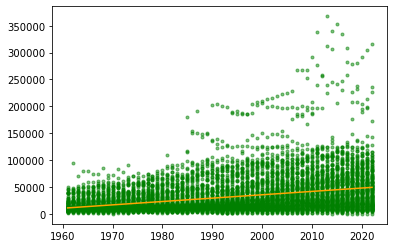

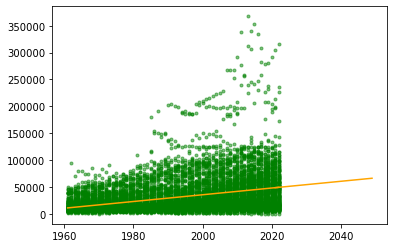

In [8]:
import pandas as pd

file_path = r'C:\thisAKcode.github.io\Pelican\assets\FAOSTAT_CORN.csv'
# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df[df['Item'] == 'Maize (corn)']  
# Now 'df' contains the data from your CSV file only Maize in France
X = np.array(list(df['Year Code'])).reshape(-1,1)
Y = np.array(list(df['Value'])).reshape(-1,1)

regr = LinearRegression()
regr.fit(X, Y)
print(regr.coef_[0])
print(regr.intercept_)

y_predict = regr.predict(X)

# plt.plot(X, y_predicted)
plt.plot(X,Y, '.' , alpha=0.5, c = 'green')
plt.plot(X,y_predict, c = 'orange')
plt.show()


# Forecasting: Can we use historical data 
# to accurately forecast values of a dependent variable (yield)? 
X_future = np.array(range(2021,2050))
X_future = X_future.reshape(-1,1)

future_predict = regr.predict(X_future)

plt.plot(X,Y, '.' , alpha=0.5, c = 'green')
plt.plot(X,y_predict, c = 'orange')
plt.plot(X_future, future_predict, c = 'orange')

plt.show()

### How to Approach the Multidimensional Data

The relationship between two variables is now clear to deal with, but  what if there are other variables that factor in to dependent variable.

Relationship: Is there a relationship between variables yield, precocity and geographic zones? Can we predict the value of one variable (yield) based on the values of other variables (features)?

Impact of independent variables: How do changes in one or more independent variables (other geographic zone) hypothetically affect the dependent variable? Which other independent variables may have a significant impact on the dependent variable?

Forecasting: Can we use historical data to accurately forecast values of a dependent variable (yield)? 

Causal analysis: Does a change in one variable cause a change in another variable? (Identify potential causal relationships between variables).

Control for confounding factors: Can we control for the influence of other factors and determine the specific impact of a particular variable on the dependent variable? Regression analysis allows for controlling and isolating the effects of different variables.

Model evaluation and improvement: How well does the regression model fit the data? Can the model be improved by including additional variables?

### Multiple Linear Regression (MLR)

If we have multiple factors to predict the values of dependent variable we'll use Multiple Linear Regression (MLR). For example when making predictions for yield, our dependent variable, we’ll want to use multiple independent variables as variety, geographic zone etc and look at relationships. Notice the independent variables are what you change to get effect on the dependent variable whose variation you are trying to model. 

So, looking at the way growth conditions affects the yield of a  plant, the independent variables would be:

    Geographic zone
    Variety
    ...

The dependent variable would be yield.

MLR is based on the following equation.

$\
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n + \varepsilon
\$

where:
- $ Y $ is the dependent variable,
- $\beta_0 \$ is the y-intercept,

- $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients of the independent variables determining which independent variable carries more weight.
$ ( X_1, X_2, \ldots, X_n )$ respectively,
- $ \varepsilon $ is the error term,
- $ X_1, X_2, \ldots, X_n $ are the independent variables.

### Boston Housing Data for MLR
### Let's Write MLR for Boston Housing
In Boston housing the input rows has an attribute 'MEDV' that represents price in 1000 $ that is the dependent variable. 

#### 1. Split the Data into Training & Test

As step one, divide the whole data at hand into data that the algorithm will learn from - training set (80%) 
and test set (20%) - part that you partitioned away that you’re actually interested in classifying. It will be used to evaluate models performance.

For each item we are interested in n features (input variables), and 1 label (output variable) features are the input information, and labels are the output or the target variable that the machine learning model aims to predict.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = load_boston()
X = data['data']
y = data['target']


values = np.c_[X, y]

df = pd.DataFrame(values)

# MEDV, the median value of owner-occupied homes in $1000's
cols = list(data['feature_names']) + ['MEDV']

df.columns = cols
df.head()

columns = [
'CRIM',    # per capita crime rate by town
'INDUS',   # proportion of non-retail business acres per town 
'NOX',     # nitric oxides concentration (parts per 10 million)
'RM',      # average number of rooms per dwelling
'AGE',     # proportion of owner-occupied units built prior to 1940
'DIS',     #  weighted distances to five Boston employment centres
'RAD',     #  index of accessibility to radial highways
'PTRATIO', #  pupil-teacher ratio by town
'B',       # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
'LSTAT'    # % lower status of the population
]

x = df[columns]

# Create a df that selects the median value column
y = df[['MEDV']] #         - MEDV     Median value of owner-occupied homes in $1000's

# scikit learn has a special method for that purpose: 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

#### 2. Create a Model, Fit to Your Data (Training the Model), Predict Output Variable

The steps for MLR in scikit-learn are identical to the steps for simple linear regression:

In [10]:
mlr = LinearRegression()

mlr.fit(x_train, y_train) 

y_predict = mlr.predict(x_test) 
# attributes are pulled together into an array:
jondoes_apartment = [[11.57790,18.10,0.700,5.036,97.0,1.7700,24.0,20.2,396.90,25.68]]

predict = mlr.predict(jondoes_apartment)

print("Predicted median value in K$ %.2f" % predict)

Predicted median value in K$ 9.87


####  3. Visualize Results
After performed MLR,there is an array with predicted values in variable y_predict. Create a scatterplot like follows: 

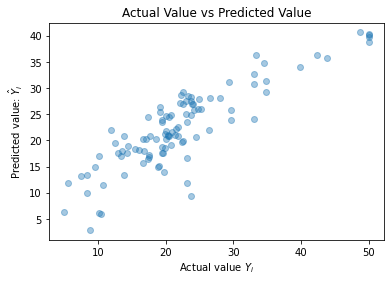

In [11]:
plt.scatter(y_test, y_predict, alpha=0.4)

plt.xlabel("Actual value $Y_i$")
plt.ylabel("Predicted value: $\hat{Y}_i$")
plt.title("Actual Value vs Predicted Value")
plt.show()

#### 4. Correlations

To see linear interaction between value of a house and variables, different features plotted against MEDV (median value of a house). 2D scatterplot shows how the independent variables impact it. 
Before I move on I compute the correlation between the variable price and other variables that price might depend on.

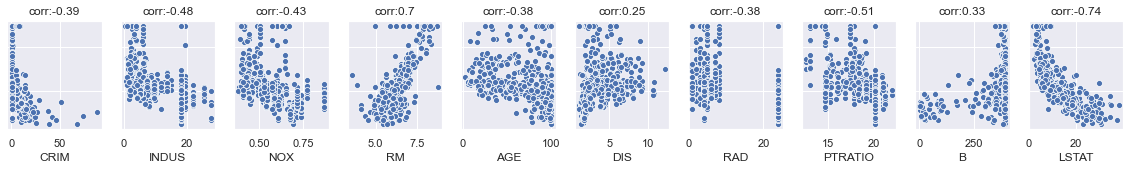

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is a DataFrame with columns X, Y1, Y2, ..., Yn
sns.set(style="ticks")

# Choose the aspect ratio and size of the plots
sns.set(rc={"figure.figsize":(20, 2)})


# Loop through each Y variable and create scatter plots
x_variable = 'MEDV'   #  actual column name of your variable
y_variables = columns # Replace with the actual column names of your variables

correlations = [round(df[x_variable].corr(df[i]), 2) 
                for i in y_variables]
for i, y_var in enumerate(y_variables, start=1):
    plt.subplot(1, len(y_variables), i)
    plt.tick_params(axis='y', which='both', left=False, labelleft=False)
    sns.scatterplot( df[y_var], df[x_variable])
    plt.title(f'corr:{correlations[i-1]}')

plt.show()

Graphically, when you see a downward or upward trend,then a negative or a positive linear relationship exist respectively. Is there a strong correlation on a preceding plot? To understand how features potentially affect price linearly the different features against 'Median Value' were printed above each subplot. 

Correlation coefficients printed above each plot, indicates independent variables relationship to Dependent Variable (Response Variable) 'Median Value'. A variable RM with coefficient of 0.7 is rather strongly correlated with the Response Variable and their positive linear relationship is visible on the plot. A negative linear relationship on the contrary  means that as 'Median Value' increase, values of independent variable will decrease, e.g. LSTAT. 

#### 5. Tune & Evaluate Accuracy of a Regression Model

The equation for MLR of two independent variables is this:
$\ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \epsilon \$

And the general equation with n independent variables looks as following: 
$\ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n + \epsilon \$

Y is the dependent variable (response variable),
X1, X2 Xn are the independent variables (features),
β 0  is the intercept,
1β1, 2β2, nβn  are the coefficients associated with 1X1, 2X2, nXn  respectively,
ϵ represents the error term

The .fit() method used above returns object that has two attributes:
    
    .coef_, - coefficients;
    .intercept_, the intercept.

Coefficients help determining which independent variable has highest weight. 

In [13]:
coef_ = mlr.coef_
coef_rough = np.round_(coef_, decimals = 1, out = None)

columns = [
'CRIM',
'INDUS',
'NOX',
'RM',
'AGE',
'DIS',
'RAD',
'PTRATIO',
'B',
'LSTAT']

for i in zip(coef_rough[0], columns):
    print(i[0],'\t', i[1])

-0.1 	 CRIM
0.0 	 INDUS
-20.6 	 NOX
3.7 	 RM
0.0 	 AGE
-1.1 	 DIS
0.2 	 RAD
-1.2 	 PTRATIO
0.0 	 B
-0.6 	 LSTAT


In our model we used 10 variables, so theres also 10 coefficients. From printed result it seems that a coefficient for variable NOX -16.2 will impact the value of a house more than a coefficient of RAD 0.2 (the former negatively and latter positively). 

#### Residual analysis. Evaluation Metrics, Effect of New Variable

The difference between the actual value and the predicted value (in the latest code the actual value vs predicted value) is the residual. 
$\ e_i = y_i - \hat{y}_i \$

The real values should be pretty close to predicted y values. There are evaluation metrics to assess the performance of a regression model. Common metrics for regression include:

    mean squared error (MSE),
    root mean squared error (RMSE),
    coefficient of determination (R-squared).

All of those are related to residual analysis in the context of regression models: MSE and RMSE are metrics that directly involve the residuals. R-squared often use alongside residuals to evaluate the overall goodness of fit and is defined as: 

\$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}\$
The coefficient R² is defined as:

`R² = 1−u/v`

where u is the residual sum of squares:

`u = ((y - y_predict) ** 2).sum()`

and v is the total sum of squares (TSS) 

`v = ((y - y.mean()) ** 2).sum()`

    The numerator is u - the residual sum of squares `((y - y_predict) ** 2).sum()`
    The denominator v is the total sum of squares (TSS) measuring variation in the dependent (response) variable y: `((y - y.mean()) ** 2).sum()`

There is a sklearn's .score() method that returns the coefficient of determination (R-squared). For our model, the scores returned:

In [14]:
print(mlr.score(x_train, y_train))
print(mlr.score(x_test, y_test))

0.7140887609964526
0.7474456457818155


A higher R-squared suggests that a larger proportion of the variability in the dependent variable is captured by the model. Here is the good explanation on r-squared: <https://napsterinblue.github.io/notes/machine_learning/regression/r_squared/>

Providing a measure of how well the model predictions align with the actual data points. Lower values for MSE and RMSE indicate better model performance. 

Here i used the .score() method from LinearRegression to find the coefficient of determination (R²) for the testing set.

We got the R² for our model is 0.83 - that means that all the x variables together explain 83% variation in dependent variable y.

Speaking of accuracy it is  possible to add another x variable, 'sweetness' to our model. The effect of adding this x variable can be that the R² can go up to say 0.98. All x included by now explain 98% of the variation. Om the contrary you can remove some of the features that don’t have strong correlations! Good enough is to get a R² of 0.70.

### Logistic Regression
In logistic regression, the goal is to model the probability that a given input belongs to a certain category or class. A common example might be classifying whether an email is spam or not based on features such as the frequency of certain words, presence of certain phrases, etc.

| Feature 1 (Word Frequency) | Feature 2 (Length) | Feature 3 (Contains Links) | Class (Spam or Not) |
|-----------------------------|--------------------|----------------------------|---------------------|
|             0.3             |         10         |             0              |          0          |
|             0.5             |         15         |             1              |          1          |
|             0.1             |         8          |             0              |          0          |
|             0.8             |         20         |             1              |          1          |
|             0.2             |         12         |             0              |          0          |
|             0.6             |         18         |             1              |          1          |



Recall  linear regression equation was:

$\
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n + \varepsilon
\$

Now if we use linear regression to solve binary classification problem the predicted outcomes(probability) will range from negative to positive infinity. 

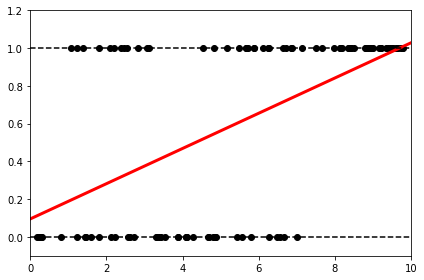

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

num_samples = 100

# Generating dummy feature
# feature1 = [round(i) for i in np.random.uniform(0, 10, num_samples)]
feature1 = np.random.uniform(low=0.0, high=10.0, size=num_samples)
# random indices class distribution
spam_indices = np.random.choice(num_samples, size=int(num_samples * 0.3), replace=False)

probability_spam = 1 / (1 + np.exp(-(feature1 - 6)))  # Sigmoid function centered around 6
    
# Generate random labels based on the probability of being spam
labels = np.random.binomial(n=1, p=probability_spam)

# Combine features and labels into a single dataset

# Initializing labels. Assigning labels for spam items
labels[spam_indices] = 1

x,y = feature1, labels

data = np.column_stack(( feature1,labels))
# Converting the numpy array to a pandas DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Labels'])

# Fit a linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.reshape(-1, 1),y.reshape(-1, 1))
sample_x = np.linspace(-10, 10, 30).reshape(-1,1)
predictions = model.predict(sample_x)

plt.plot(sample_x, predictions, color='red', linewidth=3)

plt.scatter(x = 'Feature1', y = 'Labels', data = df, color='black') # 'Feature1', 'Labels'
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')
plt.xlim(0, 10)
plt.ylim(-0.1, 1.2)

plt.tight_layout()
plt.show()

### How Logistic Regression Works

The trick for adapting a linear regression model is to use a link function to go from the straight line (that range from negative to positive infinity) into the curve between 0 and 1. 
#### Log-odds
Log-odds is called so because it is actually the natural logarithm (ln) of odds (p/(1-p)). 
The logit link function is used to map the linear combination of input features to the range [0, 1], which represents probabilities. So we apply a logit link function to the left-hand side of our linear regression function, to get our predictions.


$\
\text{logit}(y) = \ln\left(\frac{y}{1-y}\right) = \ln\left(\frac{p}{1-p}\right) = \ln\left(\frac{P(event occurring)}{P(event not occurring)}\right)\
\$

Mathematically it is the natural logarithm of the odds ratio, y is replaced with the letter p because it represents a probability. That formula is the inverse of the logistic function and is used to transform the probability of belonging to a certain class into a continuous value (probabilities back into the **log-odds** scale ) that can be modeled using linear regression techniques.

The odds of an event occurring is:
$\
\frac{P(event occurring)}{P(event not occurring)}\
\$

For example, given the probability of a mail being the spam 0.6, meaning the probability of being not spam is 1 - 0.6 = 0.4. Thus, the odds of spam are =0.6/0.4=1.5. So mail is 1.5 times more likely to be spam than not being it. 

Log odds being spam is `numpy.log(1.5)` =  0.405465, and it is positive since the probability of a mail being spam > 0.5 (0.6).

If we add to the right-hand side the regular linear regression we get the whole thing called **sigmoid_function**:
$\
\ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n + \varepsilon
\$

Suppose that we still want to fit a model that predicts whether a mail is spam. We’ll use the amount of special words as a predictor. The following code fits the model:
```python
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(special_words_in_mail, spam)
```

Next, use ordinary regression equation to make predictions for each datapoint:
```python
log_odds = [model.intercept_ + model.coef_ * word 
            for word in special_words_in_mail]
```

Notice that result for following five datapoints represents a floating point values ranging from negative to positive infinity: these are log odds.
```
[[2.123343391]
 [-1.59357205]
 [-0.00350846]
 [-3.28394203]
 [ 2.18476234]]
```
 
$\
\ln\left(\frac{p}{1-p}\right) =2.123343391
\$
Look how to convert log odd into a probability:

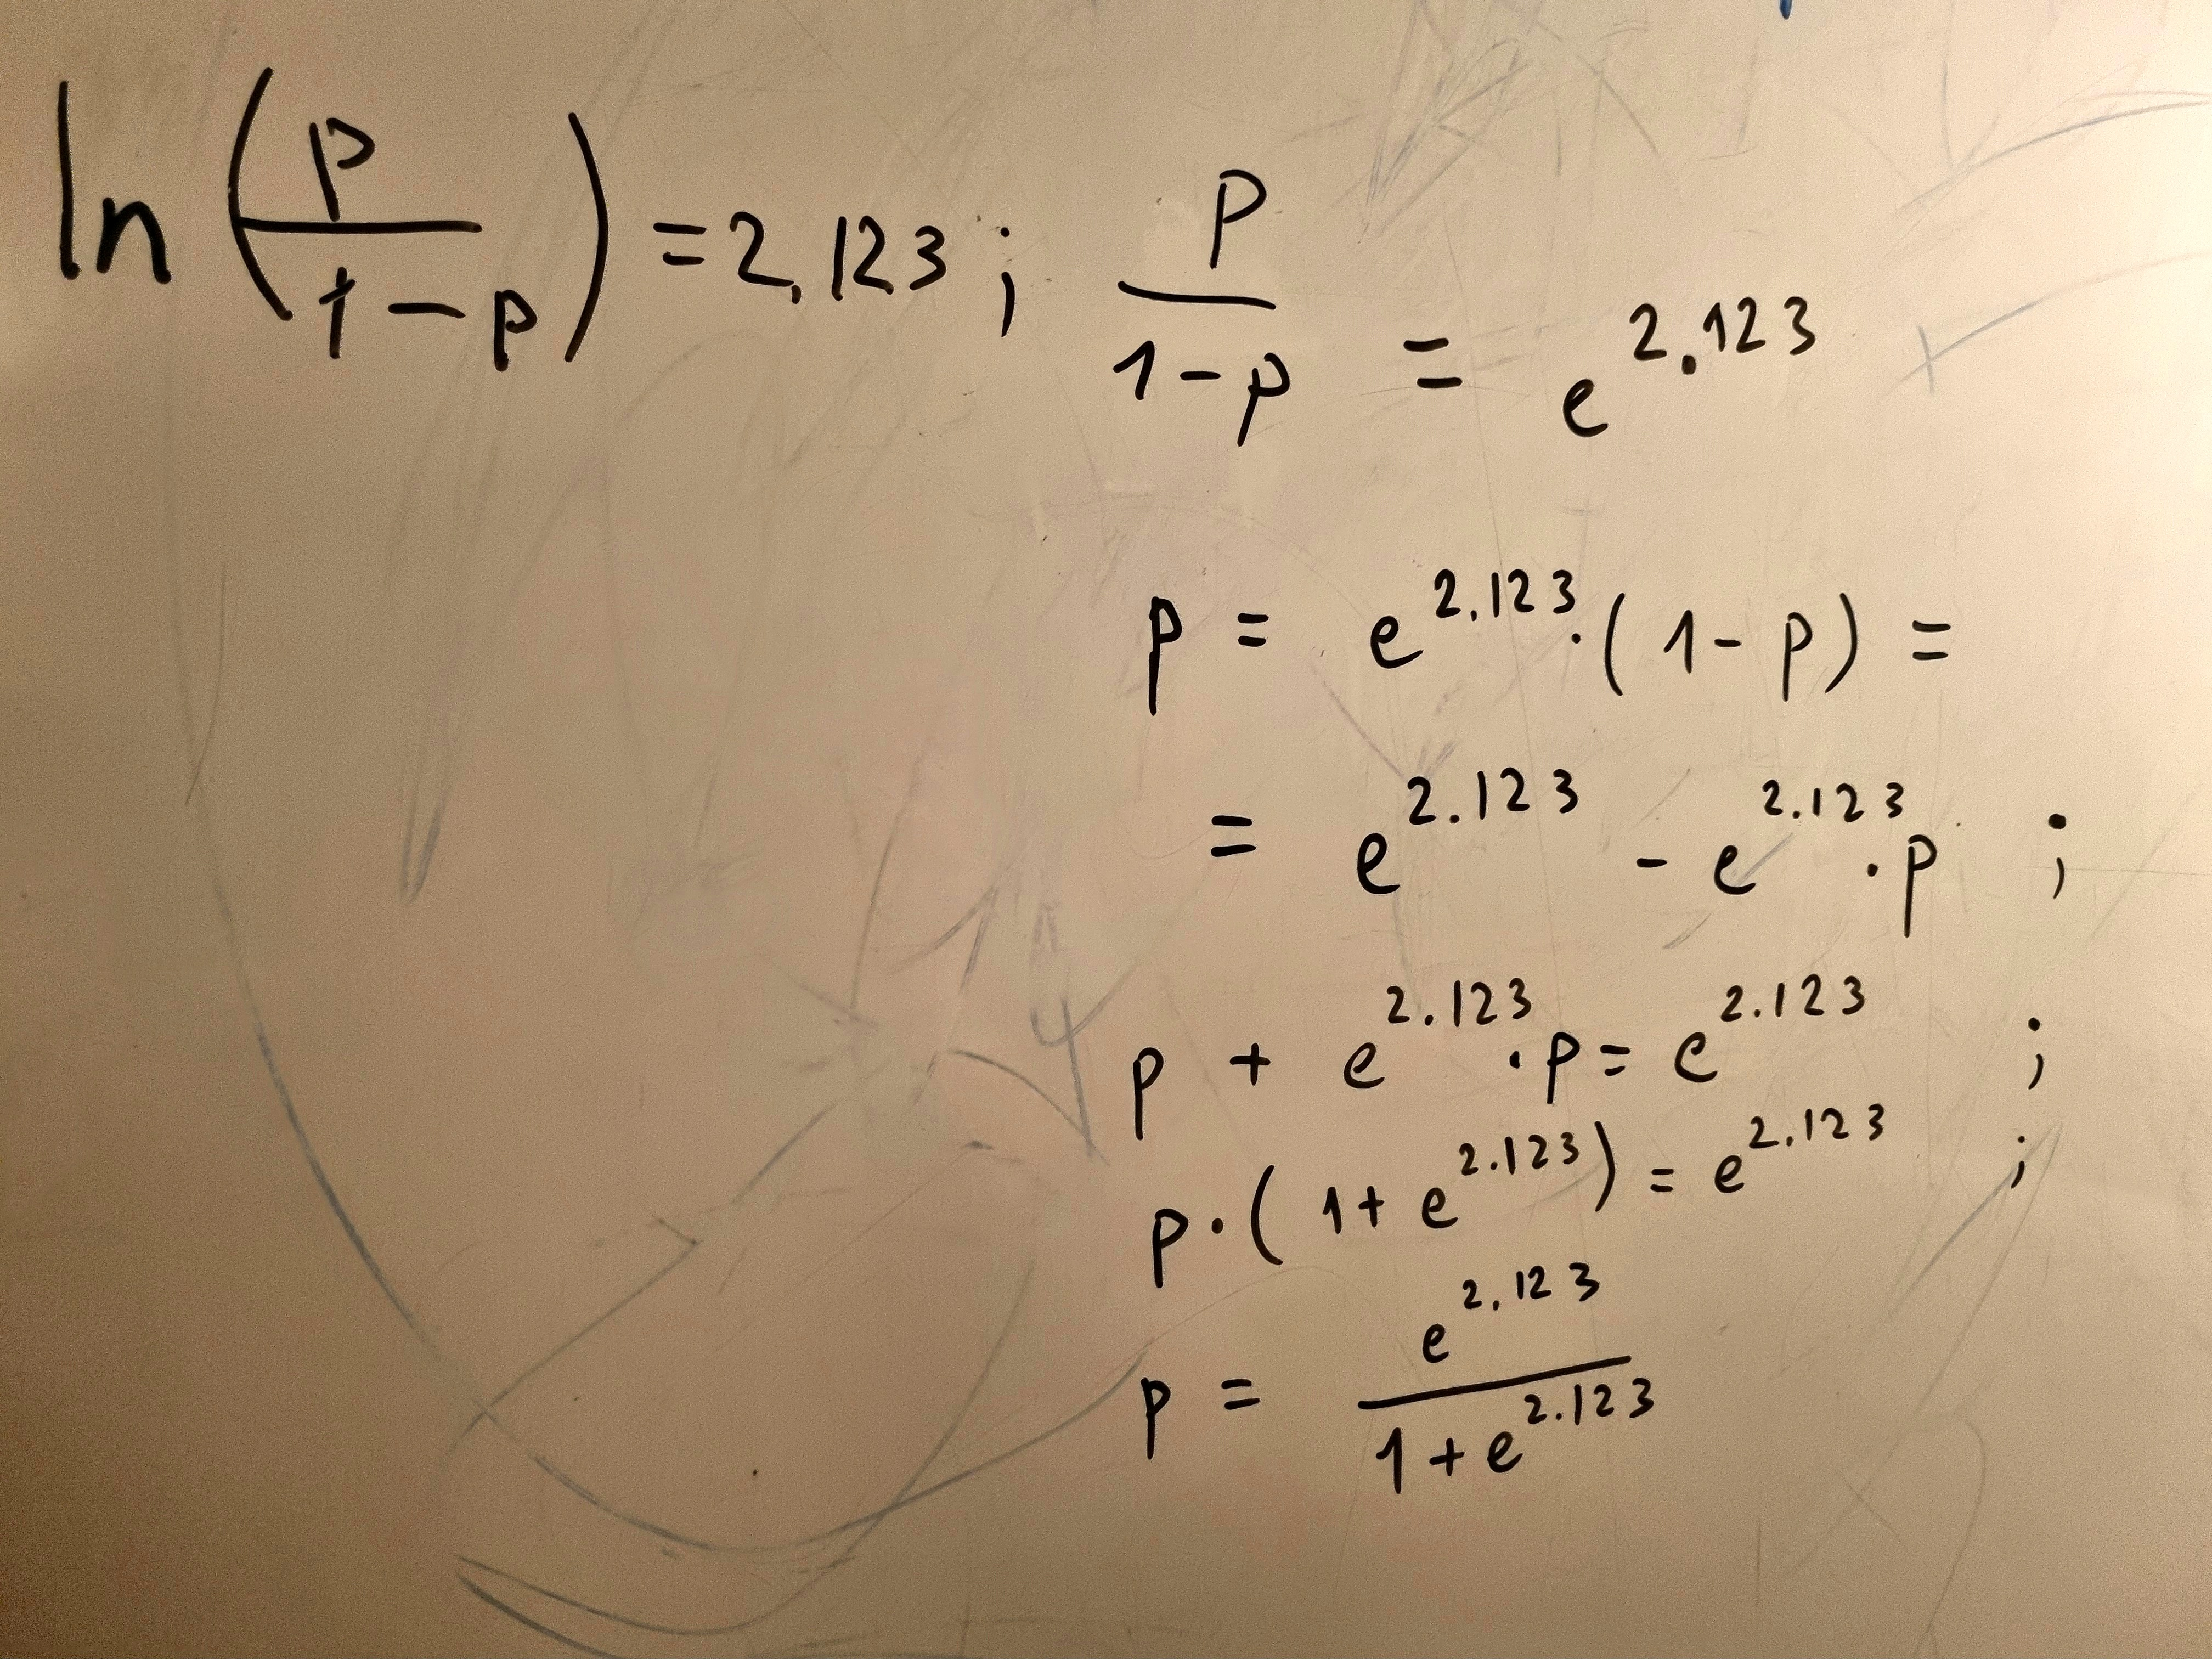

In [7]:
from IPython.display import Image
Image(r'C:\thisAKcode.github.io\images\exp_probability_derivation.jpg', width = 400) 

Once you derived:
$\
p = \frac{e^{2.123}}{1+e^{2.123}}\
\$
...
this beautiful expression (called the sigmoid function by the way ) can easily be translated into python: `np.exp(log_odds)/(1+ np.exp(log_odds))`.
Why use it? To convert the predicted log odds for each record into a  probability of 'positive' outcome and it produces the S-shaped curve (ranges between 0 and 1) instead of a line.

In [8]:
import numpy as np

log_odds = [[2.123343391],
 [-1.59357205],
 [-0.00350846],
 [-3.28394203],
 [ 2.18476234]]


log_odds_list = [i[0] for i in log_odds]
predicted_probability = [np.exp(log_odds)/(1+ np.exp(log_odds)) for log_odds in log_odds_list]
predicted_probability

[0.8931514155382025,
 0.16888192787831627,
 0.49912288589972087,
 0.036126199279330994,
 0.898872794225962]

### Sklearn's Logistic Regression Implementation

Now we are fitting the curve to our data from spam example instead of a line. 

C:\Users\Aleks\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


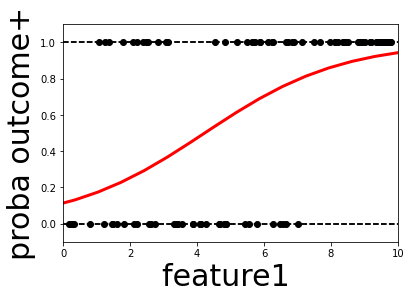

In [9]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()

x, y = x.reshape(-1, 1),y.reshape(-1, 1)

model.fit(x,y)
probability = model.predict_proba(sample_x)[:,1]

# 'Feature1', 'Labels'
plt.scatter(x = 'Feature1', y = 'Labels', data = df, color='black') 

# Plot logistic curve
plt.plot(sample_x, probability, color='red', linewidth=3)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

# Label plot and set limits
plt.ylabel('proba outcome+', fontsize = 30)
plt.xlabel('feature1 ', fontsize = 30)

plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')
plt.xlim(0, 10)
plt.ylim(-0.1, 1.1)

plt.show()

Let us look at the previous code. 
From scikit learn we create a LogisticRegression object and use its method .fit(), which takes a matrix of features and a matrix of class labels (the outcome to be predicted).


### Make Logistic Regression Right
#### Split Into Traing/Test Sets
We need to split data into training and test sets as follows:
`X_train` - feature matrix contain one dimension which is the presence of special words.
`y_train` contains the outcome for the train data (1 indicates spam and 0 indicates not spam).

In [10]:
from sklearn.model_selection  import train_test_split

#Split-Into-Traing/Test-Setson import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 27)

#### Create Logistic Regression Object, Feed With Data

Here we get our model and to interpret the coefficient and itercept think as follows: 
  - large positive coef - indicates than an increase in that feature is associated with a large increase in the log odds / probability of belonging to group labeled as 1.
  - lagre negative indicates negative correlation and the 0 is the absence of the association with the outcome.
  
Looking back at our spam example we can expect that feature (special words) is strongly associated with mails' probability of being classified as spam.

In [11]:
from sklearn.linear_model import LogisticRegression


# Print the intercept and coefficients here:
_lr = LogisticRegression()
_lr.fit(X_train, y_train)

# model.coef_
print(_lr.coef_)
print(_lr.intercept_)

[[0.46480799]]
[-1.97306055]


C:\Users\Aleks\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Classification Thresholding

Logistic regression has attribute probablility based on which we classify a datapoint belongs to.  If predicted probability of positive outcome >= 0.5 (default threshold classification), then the datapoint is assigned to the positive class. Data scientist can move the classification threshold down to 0.4 or even 0.3, whicg increase the sensitivity of our model to predicting a spam.

Imagine we have a sequence of probabilities for 5 datapoints:`[0.2906 0.7912 0.3512 0.5734 0.8712]`, taking a threshold of 0.5 gives you one classification, and another classification if we use a different threshold (e.g. 0.6). 

If we know ground truth we can count misclassified points, and choose the threshold probability that would correctly classify all or most of datapoints. 

### Confusion Matrix
A confusion matrix,is the table with counts of true positives, false positives, true negatives, and false negatives. 

For example, imagine that for 5 datapoints:[0.2906 0.7912 0.3512 0.5734 0.8712] the true and predicted classes for a logistic regression model are:
```
y_true = [0, 1, 0, 1, 1]
y_pred = [0, 1, 1, 0, 1]
```
Scikit-learn has a method for confusion matrix computation:

In [12]:
from sklearn.metrics import confusion_matrix

# Save and print the predicted outcomes
y_pred = _lr.predict(X_test)
print('predicted classes: ', y_pred)

# Print out the true outcomes for the test data
print('true      classes: ', y_test.ravel())


# Scikit learn has a method for confusion matrix computation.

print('confusion matrix:')
print(confusion_matrix(np.array(y_test), y_pred))

predicted classes:  [1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1]
true      classes:  [1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1]
confusion matrix:
[[ 5  3]
 [ 3 14]]


### Interpret Confusion Matrix

This output tells us that there are 1 true negatives, 1 false negative, 2 true positives, and 1 false positives. We strive after model giving confusion_matrix with the main diagonal (indices row0 col0, row1 col1 which are the true negatives and true positives, respectively) to be largest. Incorrect classifications were also there (false positives or false negatives). Below is my illustration to confusion matrix, you have kind of flag which is probability of classification: red - False, green - True, while heads are the true labels same color coding.
T = true, F = false, P = positive, N = negative

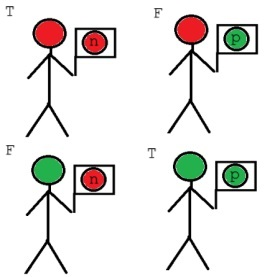

In [13]:
from IPython.display import Image
Image(r'C:\thisAKcode.github.io\Pelican\content\images\confusion_matrix.jpg', width = 200) 

### Summarize Confusion Matrix
There are four metrics  to summarize confusion matrix. :

    - Accuracy = (TP + TN)/(TP + FP + TN + FN)
    - Precision = TP/(TP + FP)
    - Recall = TP/(TP + FN)  #  (sensitivity or true positive rate)
    - F1 score: weighted average of precision and recall

Each taking value on scale between 0 and 1 where closer to 1 is better and closer to 0 is worse.

In [14]:
# accuracy:
from sklearn.metrics import *

# accuracy_score
print('accuracy:', accuracy_score(y_test, y_pred))
# output: 0.76

# precision:
print('precision_score:',precision_score(y_test, y_pred))
# output: 0.67

# recall: 
print('recall_score:', recall_score(y_test, y_pred))
# output: 0.8

# F1 score
print('f1_score',f1_score(y_test, y_pred))

accuracy: 0.76
precision_score: 0.8235294117647058
recall_score: 0.8235294117647058
f1_score 0.8235294117647058


### Logistic Regression Review

  - Goal is to perform binary classification for a dataset with a bunch of features.
  - LR implementation requires the features to beto normalized/standardized so they vary over the same range before fitting LR model (regularization happens under the hood in scikit learn). 
  - Logistic regression is when a linear regression formula extended at left side with a logit link function to fit a sigmoid curve (rather than line) to the data. Why? Since we need to coerce prediction values to be between 0 and 1, therefore we need a sigmoid function.
  - Logistic regression model returns coefficients to estimate the log odds of positive classification. To calculate the log-odds, we multiply each feature coefficient by its respective feature value, sum the products, and add the intercept. LR algorithm find the coefficient and intercept that minimize the log-loss which is cost function. '''When calculating Log-Loss, the penalty for each data sample is a function of the probability the model predicted for that sample. For confident incorrect predictions, the penalty is large, and for confident correct predictions, the penalty is small'''. <https://www.codecademy.com/courses/machine-learning-logistic-regression/quizzes/logistic-regression-quiz> The log odds casted into a probability to get predictions between 0 and 1. 
  - These coefficients give an estimate relative feature importance if more than one are used. Always check the smallest/largest magnitude coefficient.
  - A classification threshold is the spot(cutoff) from which a data sample is classified as belonging to a positive class:  the default is 0.5. Remember in the cancer example decreasing the standard classification threshold of a Logistic Regression model below 0.5 is the good idea since we then has to control more candidates that has lower yet quit high probability to get cancer.
  - A confusion matrix or summary statistics (accuracy, precision, recall, and F1 score) are the model quality metrics.

### Titanic Disaster

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### Titanic 
foo = r'C:\thisAKcode.github.io\Pelican\assets\titanic.csv'

# load data
passengers = pd.read_csv(foo)

# Cast sex column to numerical: female replaced with 1 male are replaced with 0.
datamapper = {'female':1, 'male': 0}
passengers['Sex'] = passengers['Sex'].map(datamapper)

# since passengers['Age'].values have multiple nans: passengers['Age'])
# we need to replace all the empty Age values by the mean age using fillna:
average_age = passengers['Age'].mean().round(1)
passengers['Age'] = passengers['Age'].fillna(average_age)


# Create FirstClass attribute that stores 1 for all passengers in first class and 0 for all other passengers.
'''
passengers['FirstClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 1 else 0)
passengers['SecondClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 2 else 0)
passengers['ThirdClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 3 else 0)
'''

# If you have a single column containing information about classes, 
# and you want to split it into separate columns for first, second, and third class, 
# you can use pandas' get_dummies() function to create binary columns for each class. Then, you can concatenate these binary columns to the original 
# Use get_dummies() to create binary columns for each class
class_dummies = pd.get_dummies(passengers['Pclass'])
# Rename the binary columns to 'first', 'second', and 'third'
class_dummies = class_dummies.rename(columns={1: 'FirstClass', 2: 'SecondClass', 3: 'ThirdClass'})
'''
FirstClass SecondClass ThirdClass
    
      0      0      1
      1      0      0
      0      0      1
'''
# Concatenate the binary columns with the original DataFrame
passengers = pd.concat([passengers, class_dummies], axis=1)
passengers

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886                              Montvila, Rev. Juozas    0  27.0      0   
887                       Graham, Miss. Margaret Edith    1  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"    1  29.7      1   
889                              Behr, Mr. Karl Howell    0  26.0      0   
890                                Dooley, Mr. Patrick    0  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  FirstClass  SecondClass  \
0        0         A/5 21171   7.2500   NaN        S           0            0   
1        0          PC 17599  71.2833   C85        C           1            0   
2        0  STON/O2. 3101282   7.9250   NaN        S           0            0   
3        0            113803  53.1000  C123        S           1            0   
4        0            373450   8.0500   NaN        S           0            0   
..     ...               ...      ...   ...      ...         ...          ...   
886      0            211536  13.0000   NaN        S           0            1   
887      0            112053  30.0000   B42        S           1            0   
888      2        W./C. 6607  23.4500   NaN        S           0            0   
889      0            111369  30.0000  C148        C           1            0   
890      0            370376   7.7500   NaN        Q           0            0   

     ThirdClass  
0             1  
1             0  
2             1  
3             0  
4             1  
..          ...  
886           0  
887           0  
888           1  
889           0  
890           1  

[891 rows x 15 columns]

In [2]:
# for desired features pick the relevant columns to build our model on:
features =  passengers[['Sex', 'Age', 'FirstClass','SecondClass']]

# column Survived is a target variable
survival = labels = passengers['Survived']

# perform train/test split
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size = 0.25)

# we need to scale our feature data 
# StandardScaler moves mean around 0 while scaling stdev = 1
scaler = StandardScaler()

train_features = scaler.fit_transform(X_train)
test_features = scaler.fit_transform(X_test)
scaler.mean_ #  array([ 0.30493274, 30.10502242,  0.23318386,  0.18834081])

# Create and train the model
# usinf .fit() on the training data.
model = LogisticRegression()
model.fit(X_train, y_train)

# Models score as per train data and as per test data (the whole data for final classifications) 
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

# Analyze the coefficients
# Get the coefficients of the model for every attribute in a model:
model.coef_

# print coefficients to see them for each feature 
# ['Sex', 'Age', 'FirstClass','SecondClass']]

print('\n look at coefficients: ')
for i in zip(model.coef_[0], ['Sex', 'Age', 'FirstClass','SecondClass']):
    print(i[0],'\t', i[1])

0.7919161676646707
0.7982062780269058

 look at coefficients: 
2.4347347788008524 	 Sex
-0.03792385676027189 	 Age
2.0669296054996718 	 FirstClass
1.101345945547702 	 SecondClass


In our model we used 4 variables, so theres also 4coefficients: it seems that a coefficient for variable Sex  and FirstClass will impact the value of a survivalship more than a coefficient of Age and SecondClass (the former two positively and latter negatively).

In [3]:
# Sample passenger features
Jack = np.array([0.0,20.0,0.0,0.0])
Rose = np.array([1.0,17.0,1.0,0.0])
You = np.array([1.0,36,0.0,0.0])  

sample_passengers = [Jack, Rose, You]

# sample_passengers we are making predictions on has to be scaled 
# since model was trained on scaled feature data, we must also scale the feature data  

train_features = scaler.fit_transform(sample_passengers)
# scaler.mean_ #  array([ 0.30493274, 30.10502242,  0.23318386,  0.18834081])
train_features

array([[-1.41421356, -0.5195845 , -0.70710678,  0.        ],
       [ 0.70710678, -0.87929684,  1.41421356,  0.        ],
       [ 0.70710678,  1.39888134, -0.70710678,  0.        ]])

### Make Predictions!
Who will survive? .predict() method on sample_passengers clarify the odds of you being a lucky Titanic passenger. The .predict_proba() method on sample_passengers give details on predictions: perishing/ surviving the sinking.
After the final classification it appears that regardless of the threshold the chances are bad to survive for travellers in the second class but higher if you are female even in a second class.

In [4]:
model.predict(sample_passengers)

array([0, 1, 0], dtype=int64)

In [5]:
model.predict_proba(sample_passengers)

array([[0.86742051, 0.13257949],
       [0.06081966, 0.93918034],
       [0.51259443, 0.48740557]])

### Logistic Regression Deep Dive. Assumptions

##### Assumptions 1, 2, 3
Given a data remember there are primary assumptions about the data that goes into LR:
1. Target Variable is binary.
2. Independent Observations (no repeated items): bad if for example individuals included in sample multiple times. Always compare the number of unique IDs with sample size - it should be the same: `df.id.nunique() == df.id.count()`. 
3. Large sample size so the model do not fail to converge: lm is fit using maximum likelihood estimation instead of least squares minimization to get convergence big sample needed - **a rule of thumb** at least **10 samples per feature** for the smallest class in the outcome variable: `max_features = (the smallest class size) / 10` which is `max_features = min(df.my_target variable.value_counts()/10)`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler #not currently used
from scipy.stats import zscore #not needed but built in


file_path = r'C:\thisAKcode.github.io\Pelican\assets\breast_cancer.csv'
# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# 1. assumption 1 encode target variable using mapper: malignant as 1, benign as 0
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

#2. check assumption 2
df.id.nunique() == df.id.count()

# those are used to make prediction of target variable
predictor_var = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
#3. check assumption 3 Big size enough so the model do not fail to converge
# figure out amount of features
max_features = min(df.diagnosis.value_counts()/10)

##### Assumption 4
No influential outliers: any extremely influential outliers  are bad for model building - rule out them using z-scores, scaler of the IQR, Cook's distance/influence/leverage. 

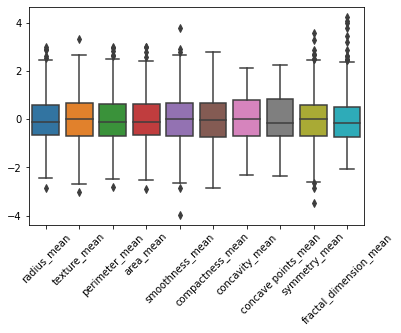

In [2]:
# features not normally distributed notice boxplot represents 
# the log-transformed z-scores np.log()

#4. No influential outliers
sns.boxplot(data=np.log(df[predictor_var]+.01).apply(zscore))
plt.xticks(rotation=45);
plt.show()
plt.close()

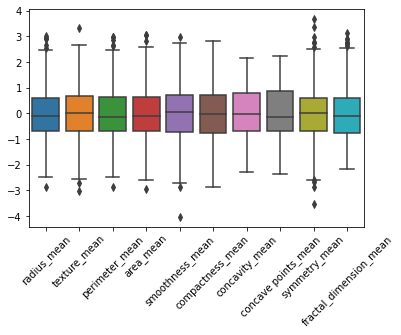

In [3]:
# removes the samples with extreme fractal_dimensions_mean values:
q_hi  = df["fractal_dimension_mean"].quantile(0.99)
df_filtered = df[(df["fractal_dimension_mean"] < q_hi)]

# boxplot with the filtered dataframe:
sns.boxplot(data=np.log(df_filtered[predictor_var]+.01).apply(zscore))
plt.xticks(rotation=45);
plt.show()
plt.close()

Now you can see that `fractal_dimension_mean` has less extreme outliers number. As per assumption 4 LR is sensitive to extreme outliers causing distorsion of findings. Notice `fractal_dimension_mean` feature has many extreme outliers above the box distribution(grouping).

##### Assumption 5 Logit Linearly Related to Feature

5. Linear relationship between features and log odds(the logit of the outcome) has to exist. Easy to get the visual proof of it using Seaborn regplot (sns.regplot()), with the parameter logistic= True and the feature of interest as argument x. Look at the plot to see if fit model will resemble a sigmoidal curve for feature area_mean.

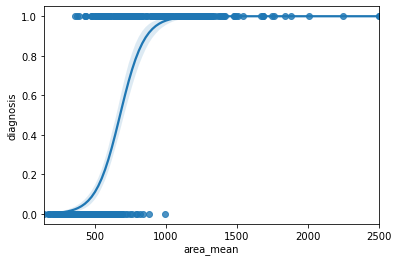

<Figure size 360x504 with 0 Axes>

In [4]:
x = df_filtered[predictor_var]
#Compare the curves
sns.regplot(x= 'area_mean', y= 'diagnosis', data= df, logistic= True)
plt.figure(figsize = (5,7))
plt.show()
plt.close()

The fit model resemble a sigmoidal curve - linear relationship exist between some features and the target variable in example above. On the contrary if we take a feature `fractal_dimension_mean` to get a sigmoidal curve we get a proof of absence of linear relationship between it and target variable. 

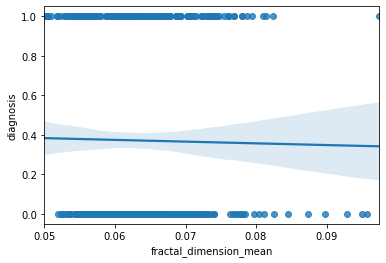

In [5]:
sns.regplot(x= 'fractal_dimension_mean', y= 'diagnosis', data= df, logistic= True)
plt.show()
plt.close()

##### Assumption 6 
Multicollinearity in the data is not a good assumption for use of lr. Eliminate highly correlated features otherwise the coefficients and p-values will be inaccurate. 

Identify which features are highly correlated and drop one of the features: heatmap correlation plot is a good tool for identifying and to be able to eliminate features of high correlation.

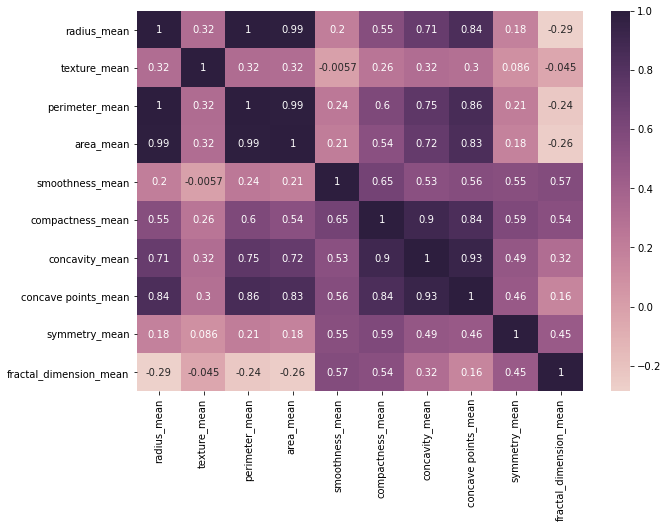

In [6]:
plt.figure(figsize = (10,7))
sns.heatmap(x.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

plt.show()

You can now identify highly correlated features and eliminate them from model 
`correlated_pair = ['compactness_mean', 'concavity_mean']` by simply dropping the highly correlated features `df = df.drop(columns=correlated_pair)`. So our predictor variables that are left to participate in lr analysis against outcome variable are following:

In [7]:
predictor_var = ['radius_mean', 'texture_mean', 
                  'compactness_mean',
                 'symmetry_mean',]

outcome_var='diagnosis'

x_train, x_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var], random_state=0, test_size=0.3)

##### Model Hyperparameters

Hyperparameters are set before training a model and tuned later to improve model performance while parameters (not hyper) are the attributes of the model implementation (the intercept and coefficients).

In [8]:
#1. Fit lr with hyperparameters of no regularization
log_reg = LogisticRegression(
    penalty = 'none',    # no regularization - no penalty(set penalty to 'none' the default is 'l2')
    fit_intercept = True # no intercept term setting                            )
)

#2. Fit the model to training data print cofficient and intercept
log_reg.fit(x_train, y_train)
    
print(log_reg.get_params())
coefficients = log_reg.coef_
intercept = log_reg.intercept_
print(coefficients, intercept)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[[ 1.07991529  0.28744917 30.96010078 29.97251649]] [-30.15566409]


##### Evaluation Metrics of Classification
The valuation metrics are common with those for classification tasks. I mentioned them in this article, brush up some concepts in 'Interpret Confusion Matrix' section above. **Accuracy** – correct predictions count out of the total is one of them but it is misleading metric for imbalanced classes. For predicting probability for one particular class other metrics may be more appropriate to evaluate models performance: precision, recall, or F1-score.

**So which metrics matter most for cancer analysis?** 
For cancer dataset, predicting ALL malignant cases as malignant is important regardless of some false positives (true benign marked as possibly malignant)- discarded by follow-up tests; missing a malignant case (false negative) is an expensive mistake. Pulling down false negative will maximize the recall ratio (true positive rate).
Recall = TP/(TP + FN)

Let us explore common evaluation metrics for classification. For this we use the predicted outcomes and ground truth test data (x_test).

In [9]:
#3. Calculate metrics accuracy, precision, recall, f1.
y_pred = log_reg.predict(x_test)
accuracy, precision, recall, f1 = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)


print(f'Test set accuracy:\t{accuracy}')
print(f'Test set precision:\t{precision}')
print(f'Test set recall:\t{recall}')
print(f'Test set f1-score:\t{f1}')

Test set accuracy:	0.9064327485380117
Test set precision:	0.8507462686567164
Test set recall:	0.9047619047619048
Test set f1-score:	0.8769230769230769


### Confusion Matrix as Evaluation Metrics
There are four possible categories: True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN). The predicted classes goes as columns and the actual classes are represented as rows.
Confusion matrix is a nice way to get an overview of model predictions. 
```
| *        | Predicted - | Predicted + |
|----------|-------------|-------------|
| Actual - | TN          | FP          |
| Actual + | FN          | TP          |

```
How many tumors were predicted correctly? How many people's tumors were predicted as false benign and vise versa?

In [10]:
test_conf_matrix = pd.DataFrame(
     confusion_matrix(y_test, y_pred), 
     index=['actual no', 'actual yes'], 
     columns=['predicted no', 'predicted yes']
 )
print('Confusion Matrix: Threshold 50%')

print(test_conf_matrix)

Confusion Matrix: Threshold 50%
            predicted no  predicted yes
actual no             98             10
actual yes             6             57


When looking at the confusion matrix (look Interpret Confusion Matrix section) answer following questions: 
1. How many correct predictions there are for true positives? 
2. Questions about incorrect classifications were also there (false positives or false negatives): how many were classed as benign while being malignant in fact (vise versa)?

You can take one step further and visualize the confusion matrix. 

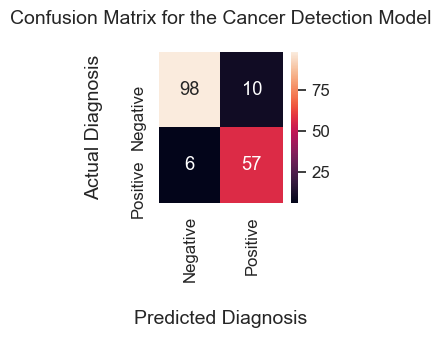

In [11]:
import seaborn as sns


# Change figure size and increase dpi for better resolution
plt.figure(figsize=(2,2), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)
 
# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
ax = sns.heatmap(test_conf_matrix, annot=True, )
 
# set x-axis label and ticks. 
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
 
# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
 
# set plot title
ax.set_title("Confusion Matrix for the Cancer Detection Model", fontsize=14, pad=20)
 
plt.show()

##### Thresholds 
Along with class of a sample there is a probability value. Threshold of lowest probability of positive outcome (was named before) helps to tune a model's predictions. An example of a prediction threshold: a default probability > 50% means predicted positive outcome.This way two samples with predicted probabilities of 51% and 99% are considered positive.

The nice way to visualize overlay between positive and negative classes is the histogram of the predicted probabilities for the lr classifier.  A lot of points of negative class are grouped around zero probability value. 
Higher threshold gives fewer false positives and more false negatives, whereas a lower one is associated with fewer false negatives and more false positives.

Untill now, we’ve trained a logreg model, fit data and calculated the predicted class. We can manage to get probability of true outcome =1 when y_pred_prob > 0.5 and 0 otherwise. The predict_proba method gives us the predicted probabilities out of the box and both results can be compared using array_equal():

In [12]:
y_pred_prob = log_reg.predict_proba(x_test)
y_pred_prob

# Using the predicted probabilities to get the predicted class
# in order to illustrate that the scikit learn  threshold for probability value is 0.5  
# meaning that values over 0.5 are classed as positive outcomre for binary classification.
y_pred_class = (y_pred_prob[:,1]>0.5)*1.0

diff = np.array_equal(y_pred_class,y_pred)
print(diff)

True


In [13]:
thresh = np.linspace(0,1,100).round(2)
thresh

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

Let us try alternative thresholds: 

In [14]:
false_negatives = []
for t in thresh:
  cm = confusion_matrix(y_test, (y_pred_prob[:,1]>t)*1.0)
  # pick false negatives from the confusion matrix
  # append to the false negatives
  false_negatives.append(cm[1][0])
data = list(zip(thresh,false_negatives)) 
print('threshold, probabilities pairs are printed:',data)

threshold, probabilities pairs are printed: [(0.0, 0), (0.01, 0), (0.02, 0), (0.03, 0), (0.04, 0), (0.05, 0), (0.06, 0), (0.07, 0), (0.08, 0), (0.09, 0), (0.1, 0), (0.11, 0), (0.12, 0), (0.13, 0), (0.14, 0), (0.15, 0), (0.16, 0), (0.17, 0), (0.18, 0), (0.19, 0), (0.2, 0), (0.21, 1), (0.22, 2), (0.23, 2), (0.24, 2), (0.25, 2), (0.26, 3), (0.27, 3), (0.28, 3), (0.29, 3), (0.3, 3), (0.31, 3), (0.32, 4), (0.33, 4), (0.34, 4), (0.35, 5), (0.36, 5), (0.37, 5), (0.38, 5), (0.39, 5), (0.4, 5), (0.41, 6), (0.42, 6), (0.43, 6), (0.44, 6), (0.45, 6), (0.46, 6), (0.47, 6), (0.48, 6), (0.49, 6), (0.51, 7), (0.52, 7), (0.53, 7), (0.54, 7), (0.55, 7), (0.56, 7), (0.57, 7), (0.58, 7), (0.59, 7), (0.6, 7), (0.61, 7), (0.62, 8), (0.63, 8), (0.64, 9), (0.65, 9), (0.66, 9), (0.67, 10), (0.68, 10), (0.69, 10), (0.7, 11), (0.71, 11), (0.72, 11), (0.73, 11), (0.74, 11), (0.75, 11), (0.76, 12), (0.77, 13), (0.78, 13), (0.79, 13), (0.8, 13), (0.81, 14), (0.82, 15), (0.83, 15), (0.84, 15), (0.85, 16), (0.86, 16

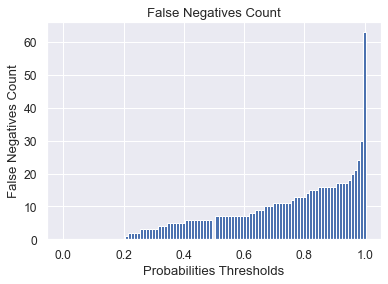

In [15]:
import matplotlib.pyplot as plt

frequencies, values  = zip(*data)  # Separate values and frequencies

plt.bar( frequencies,values, width=0.01)  # Plot histogram
plt.xlabel('Probabilities Thresholds')
plt.ylabel('False Negatives Count')
plt.title('False Negatives Count')
plt.show()

On the latest barplot you see how a number of false negatives increases along with threshold values: with the lowest threshold value all the malignant cases are identified (0 false negatives). A higher value gives more false negatives. Whereas a lower value is associated with fewer false negatives and more false positives.
Use threshols to tune a model's prediction accuracy. 

##### ROC Curves and Area Under the Curve
We inspected a continuum of predictions as per parameterized model by giving the sequence of thresholds in range (0.0 - 1.0) - remember I used np.linespace for this.

There is another way to look at those metrics using: 

the True Positive Rate (TPR): `TPR = TP / TP + FN`,

the False Positive Rate (FPR):`FPR = FP / TP + FP`.

Plotting these rates as points (TPR on the y-axis and FPR on the x-axis) gives a Receiver Operating Characteristic (ROC) curve. ROC can help choose a threshold that best fits our problem, here: catch every malignant tumor meaning higher TPR.
Once ROC is plotted we can get the 

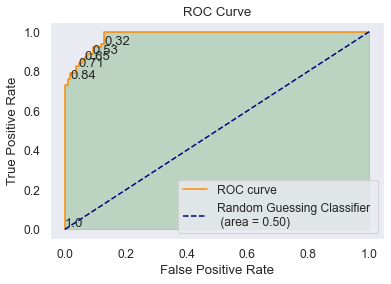

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, roc_auc_score


fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.fill_between(fpr, tpr, alpha=0.2, color='green')
idx = list(range(len(thresholds)))[1::4]
for i in idx:
    # this portion plot labels on curve
    plt.text(fpr[i], tpr[i], thresholds[i].round(2))
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])

# make Dummy Classification lineto illustrate the random guessing.
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(x_train, y_train)
roc_auc_rand = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1] )

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, color='navy',linestyle='--', label=f'Random Guessing Classifier \n (area = {roc_auc_rand:0.2f})' % roc_auc_rand)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")

plt.show()

In [17]:
print(roc_auc)

0.9810405643738976


The AUC of 0.98 (close to 1) is an indicator of good model separability: is good at distinguishing between malignant and benign tumors with high TPR (true positive rate) also called a **recall**.

#####  Managing Class Imbalance to Increase Recall Score
In real world individuals deals with conformity which I thought is a good analogy with class imbalance. 
Class imbalance is when the binary categories of outcome variable isn't evenly distributed by data points.  

Classes are more or less imbalanced and the majority class is predicted more often and therefore it may create a bias toward it. 


To identify the imbalance use **Positivity Rate** , then use one of the following to counteract it (get higher recall score): 
* Stratified Sampling, 
* Under-/Oversampling, 
* Class Width Balancing. 


##### Positivity Rate

Positivity Rate = Total True Positives / Total Cases, values being around 0.5 indicates balanced classes.

In [18]:
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Recall and Accuracy scores')
print(recall, accuracy)

Recall and Accuracy scores
0.9047619047619048 0.9064327485380117


##### Stratified Sampling and its Effect
When small dataset with imbalanced classes are splitted into test/traing datasets it increases differences between classes size even more: a random split using stratification on the class labels ensures  that the distribution of the target variable (labels) is maintained across different subsets of the data. If dataset originally has 70% instances of class A and 30% instances of class B, then after stratification the same class distribution is preserved.

So contrary to the default test train split...

```python
x_train, x_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var], random_state=0, test_size=0.3)

```
... we want to test stratified sampling approach, using **stratify** argument available out of the box in scikit-learn.

In [24]:
# stratified sampling 
x_train_str, x_test_str, y_train_str, y_test_str = train_test_split(
    df[predictor_var], df[outcome_var], random_state=0, test_size=0.3,
    stratify = df[outcome_var])


# positivity rates after stratification
# stratified train positivity rate:
str_train_positivity_rate = sum(y_train_str)/y_train_str.shape[0]
# stratified test positivity rate:
str_test_positivity_rate = sum(y_test_str)/y_test_str.shape[0]


print(f'stratified train positivity rate: {str_train_positivity_rate}')
print(f'stratified test positivity rate: {str_test_positivity_rate } ')

stratified train positivity rate: 0.37185929648241206
stratified test positivity rate: 0.3742690058479532 


After observing positivity rates as per stratified sampling the positivity rates appears similar.

In [20]:
train_positivity_rate = sum(y_train)/y_train.shape[0]
test_positivity_rate = sum(y_test)/y_test.shape[0]


print(f'Orig train positivity rate: {train_positivity_rate}')
print(f'Orig test positivity rate:{test_positivity_rate } ')

Orig train positivity rate: 0.3743718592964824
Orig test positivity rate:0.3684210526315789 


In [21]:
# Model predictions from stratified data 
log_reg.fit(x_train_str, y_train_str)
y_pred = log_reg.predict(x_test_str)
recall_str = recall_score(y_test_str, y_pred)
accuracy_str = accuracy_score( y_test_str, y_pred)

In [25]:
# model prediction metrics after Stratified sampling 


print('Stratified Sampling: Recall and Accuracy scores', recall_str,accuracy_str)

Stratified Sampling: Recall and Accuracy scores 0.890625 0.9122807017543859


Recall decreased a little in connection with stratification and accuracy increased.

### Bonus Lines
Gradient descent is useful optimization algorithm not only to improve a regression model. When I was describing loss function it comes to mind the example in a book by François Chollet on loss function.
Even if it is described in another context, I will have it here anyways.

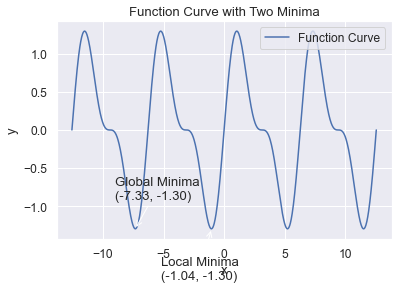

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function with two minima
def my_function(x):
    return np.sin(x) + 0.5 * np.sin(2 * x)

# Generate x values
x_values = np.linspace(-4 * np.pi, 4 * np.pi, 1000)

# Compute y values using the defined function
y_values = my_function(x_values)

# Find the global minimum
global_min_x = np.argmin(y_values)
global_min_y = y_values[global_min_x]

# Find a local minimum
local_min_x = np.argmin(y_values[400:600]) + 400
local_min_y = y_values[local_min_x]

# Plot the curve
plt.plot(x_values, y_values, label='Function Curve')
# plt.scatter([global_min_x, local_min_x], [global_min_y, local_min_y], color='red', label='Minima')

# Annotate the minima
plt.annotate(f'Global Minima\n({x_values[global_min_x]:.2f}, {global_min_y:.2f})', 
             xy=(x_values[global_min_x], global_min_y), xytext=(-20, 30),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate(f'Local Minima\n({x_values[local_min_x]:.2f}, {local_min_y:.2f})', 
             xy=(x_values[local_min_x], local_min_y), xytext=(-50, -50),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Curve with Two Minima')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

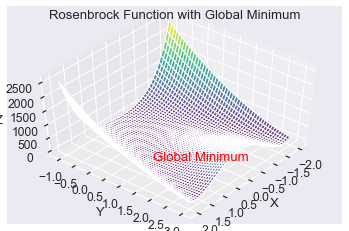

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Generate x and y values
x_values = np.linspace(-2, 2, 100)
y_values = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_values, y_values)

# Compute the Rosenbrock function values
Z = rosenbrock(X, Y)

# Find the global minimum
global_min_indices = np.unravel_index(np.argmin(Z), Z.shape)
global_min_x, global_min_y = x_values[global_min_indices[1]], y_values[global_min_indices[0]]
global_min_z = Z[global_min_indices]

# Plot the Rosenbrock function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(global_min_x, global_min_y, global_min_z, color='red', label='Global Minimum')

# Annotate the global minimum
ax.text(global_min_x, global_min_y, global_min_z, 'Global Minimum', color='red')

# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rosenbrock Function with Global Minimum')
ax.view_init(elev=50, azim=40)
plt.show()

### Dummy Data for MLR
Create a pandas DataFrame with columns for corn yield, variety, precocity, and geographic zone. Here I will generate  data for corn production problem using the numpy and pandas. 

In [16]:
import numpy as np
import pandas as pd

# seed for reproducibility
np.random.seed(42)

# define global variables
NUM_VAR = 4
NUM_PREC = 5
NUM_ZONES = 10

# synthetic data
varieties = np.random.choice(range(NUM_VAR), size=(NUM_VAR * NUM_PREC * NUM_ZONES))
precocities = np.random.choice(range(NUM_PREC), size=(NUM_VAR * NUM_PREC * NUM_ZONES))
zones = np.random.choice(range(NUM_ZONES), size=(NUM_VAR * NUM_PREC * NUM_ZONES))
yield_results = np.random.uniform(low=0, high=20, size=(NUM_VAR * NUM_PREC * NUM_ZONES))

# df to store the data
df = pd.DataFrame({
    'Variety': varieties,
    'Precocity': precocities,
    'Zone': zones,
    'Yield': yield_results
})

print(df.head())

   Variety  Precocity  Zone      Yield
0        2          0     7   1.824122
1        3          3     0   9.888406
2        0          4     8   1.151175
3        2          3     5  10.990578
4        2          4     6   8.830610
